# BCG Data Science Python Coding Interview – Mock

This notebook simulates a typical BCG / BCG X Data Science Python coding interview.

Skills tested:
- pandas, numpy, scikit-learn
- data cleaning
- data transformation
- data visualization
- handling outliers
- merge
- groupby & aggregation
- missing value handling
- simple machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Customer information
customers = pd.DataFrame({
    "customer_id": [1, 2, 3, 4, 5],
    "age": [25, 35, np.nan, 45, 120],
    "city": ["NY", "SF", "NY", "LA", "SF"]
})

# Order information
orders = pd.DataFrame({
    "order_id": [101, 102, 103, 104, 105, 106],
    "customer_id": [1, 2, 2, 3, 4, 5],
    "order_amount": [100, 200, 1500, 50, np.nan, 300],
    "promotion": [1, 0, 1, 0, 1, 0]
})


### Task 1: Checking Missing Data

1. Identify which columns contain missing values.
2. Count the number of missing values in each column for both datasets.


In [2]:
print(customers.isna().sum())
print(orders.isnull().sum())

customer_id    0
age            1
city           0
dtype: int64
order_id        0
customer_id     0
order_amount    1
promotion       0
dtype: int64


### Task 2: Replace Missing Values

Replace missing values in `order_amount` with 0.


In [3]:
orders["order_amount"] = orders["order_amount"].fillna(0)

#orders = orders.fillna(0)
#orders = orders.dropna(subset=["order_amount"]).reset_index(drop=True)

orders.isna().sum()

order_id        0
customer_id     0
order_amount    0
promotion       0
dtype: int64

### Task 3: Handling Outliers

The `age` column may contain unrealistic values.

1. Identify outliers where age is greater than 100.
2. Replace these values with the median age.


In [4]:
# 1
customers[customers["age"] > 100]

# 2 
median_age = customers["age"].median()

customers.loc[customers["age"] > 100, "age"] = median_age

customers

,customer_id,age,city
0,1,25.0,NY
1,2,35.0,SF
2,3,NaN,NY
3,4,45.0,LA
4,5,40.0,SF


In [5]:
# fillin the missing value with median age 

customers["age"] = customers["age"].fillna(median_age)

customers

,customer_id,age,city
0,1,25.0,NY
1,2,35.0,SF
2,3,40.0,NY
3,4,45.0,LA
4,5,40.0,SF


### Task 4: Data Transformation

Create a new feature `log_order_amount` using a log transformation.


In [6]:
orders["log_order_amount"] = np.log1p(orders["order_amount"])
orders["log_order_amount"]

0    4.615121
1    5.303305
2    7.313887
3    3.931826
4    0.000000
5    5.707110
Name: log_order_amount, dtype: float64

### Task 5: Merge

Merge customer information into the orders dataset using `customer_id`.
Use an appropriate join type.


In [7]:
df = pd.merge(customers, orders, on="customer_id", how="left")
df

,customer_id,age,city,order_id,order_amount,promotion,log_order_amount
0,1,25.0,NY,101,100.0,1,4.615121
1,2,35.0,SF,102,200.0,0,5.303305
2,2,35.0,SF,103,1500.0,1,7.313887
3,3,40.0,NY,104,50.0,0,3.931826
4,4,45.0,LA,105,0.0,1,0.000000
5,5,40.0,SF,106,300.0,0,5.707110


### Task 6: GroupBy & Aggregation

For each city:
- Calculate the average order amount
- Calculate the total number of orders


In [8]:
# average order amount 
avg_amount = df.groupby("city")["order_amount"].mean()
print("--- Average Order Amoung ---")
print(np.round(avg_amount, 2))

# total number of orders 
total_orders = df.groupby("city")["order_id"].count()
print("--- Total Number of Orders ---")
print(total_orders)

--- Average Order Amoung ---
city
LA      0.00
NY     75.00
SF    666.67
Name: order_amount, dtype: float64
--- Total Number of Orders ---
city
LA    1
NY    2
SF    3
Name: order_id, dtype: int64


In [9]:
city_summary = (
    df.groupby("city")
      .agg(
          avg_order_amount=("order_amount", "mean"),
          order_count=("order_id", "count")
      )
)

city_summary

,avg_order_amount,order_count
city,,
LA,0.000000,1
NY,75.000000,2
SF,666.666667,3


### Task 7: Data Visualization

Create a bar chart showing the average order amount by city.


<Axes: title={'center': 'Average Order Amount by City'}, xlabel='city'>

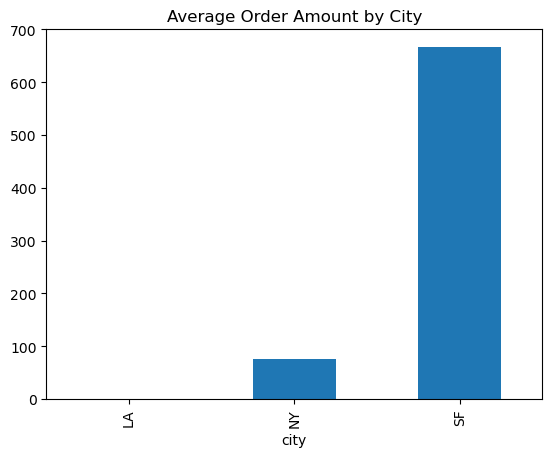

In [10]:
# pandas.plot()
avg_amount.plot(kind="bar", x="City", title="Average Order Amount by City")


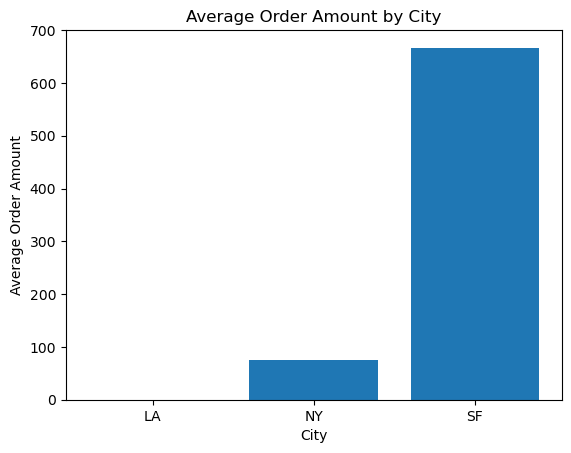

In [11]:
# matplotlib 
# plt.bar(x, height)

plt.bar(avg_amount.index, avg_amount.values)
plt.title("Average Order Amount by City")
plt.xlabel("City")
plt.ylabel("Average Order Amount")
plt.show()


### Task 8: Simple Machine Learning

1. Create a binary target variable `high_value`:
   - 1 if `order_amount > 500`
   - 0 otherwise
2. Use `age` and `promotion` as features.
3. Split the data into training and test sets.
4. Train a simple classification model.
5. Evaluate model performance.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df["high_value"] = (df["order_amount"] > 500).astype(int)

y = df["high_value"]
X = df[["age", "promotion"]]

random_state = 42

# first split to seprate out the training set 
X_train, X_other, y_train, y_other = train_test_split(
    X, y, train_size=0.6, random_state=random_state
)
X_val, X_test, y_val, y_test = train_test_split(
   X, y, train_size=0.5, random_state=random_state
)

print(X_train.head())

    age  promotion
2  35.0          1
4  45.0          1
3  40.0          0


In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
accuracy

0.3333333333333333